# Perform Principal component analysis and perform clustering using 
# first 3 principal component scores (both heirarchial and k mean     clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)df


In [139]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 


In [191]:
wine=pd.read_csv("wine.csv")
wine.head()
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [65]:
wine.shape

(178, 14)

In [66]:
wine.info()
wine['Type'].dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


dtype('int64')

In [67]:
wine.isnull().sum() #there is no null value we found in given data set

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [157]:
# Converting into numpy array
Wine = wine.data.values
Wine


array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [193]:
wine_normal = scale(Wine)
# Considering only numerical data 
wine_new = pd.DataFrame(wine, columns=['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color','Hue','Dilution','Proline'])
wine_new.drop('Type', axis=1)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Text(0.5, 1.0, 'Visualization Of Raw Data')

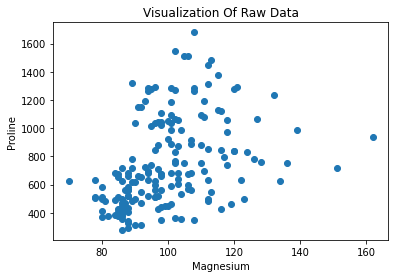

In [174]:
plt.scatter(wine.iloc[:,5],wine.iloc[:,13])
plt.xlabel('Magnesium')
plt.ylabel('Proline')
plt.title('Visualization Of Raw Data')

# First, we must fit our standardized data using PCA.
 

In [213]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
wine_std = std.fit_transform(wine_new)
wine_std

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [195]:
pca=PCA()
pca.fit(wine_std)

PCA()

In [196]:
pca.explained_variance_ratio_

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

# Second, we need to decide how many features we’d like to keep based on the cumulative variance plot.

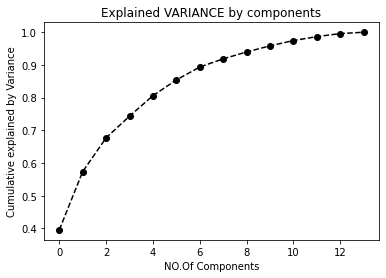

In [197]:
plt.title('Explained VARIANCE by components')
plt.xlabel('NO.Of Components')
plt.ylabel('Cumulative explained by Variance')
plt.plot(pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--',color="black")

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 6 components.

# As a third step, we perform PCA with the chosen number of components

In [303]:
pca_a=PCA(n_components=3)

In [304]:
pca_a.fit(wine_std)

PCA(n_components=3)

In [305]:
pca_scores=pca_a.transform(wine_std)

# K means clustering with PCA


In [306]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(pca_scores)
    wcss.append(kmeans.inertia_)

# The next step involves plotting the WCSS against the number of components on a graph

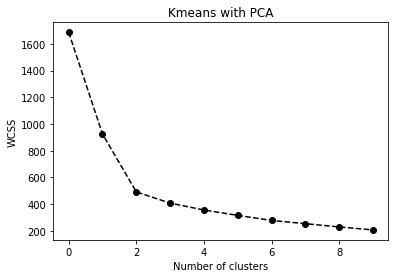

In [307]:
plt.plot(wcss,marker='o',linestyle='--',color="black")
plt.title('Kmeans with PCA')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [308]:
df_PCA = pd.DataFrame(data = wine_std, columns =['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10','Pc11','pc12','pc13','pc14'])
df_PCA['Type'] = wine['Type']
df_PCA.head(20)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Pc11,pc12,pc13,pc14,Type
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
5,-1.213944,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039,1
6,-1.213944,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520,1
7,-1.213944,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442,1
8,-1.213944,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319,1
9,-1.213944,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319,1


In [309]:
final = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), wine[['Type']]], axis = 1)

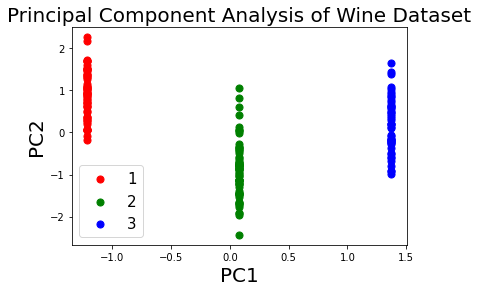

In [310]:
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Principal Component Analysis of Wine Dataset",fontsize=20)
targets = [1,2,3]
colors = ['r', 'g','b']
for target, color in zip(targets,colors):
    indicesToKeep = df_PCA['Type'] == target
    plt.scatter(df_PCA.loc[indicesToKeep, 'PC1']
               , df_PCA.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()

#  Performing both Kmeans and heirarical clustering 

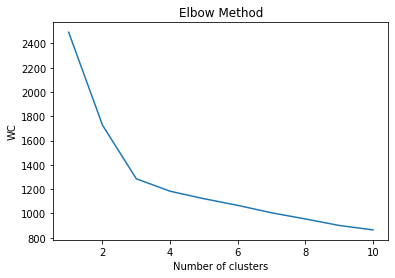

In [311]:
from sklearn.cluster import KMeans

wc=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_com)
    wc.append(kmeans.inertia_)
plt.plot(range(1, 11), wc)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WC')
plt.show()


In [320]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

n_clusters = [2,3,4,5,6,8,10]
for n_clusters in n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_com)
    silhouette_avg = silhouette_score(pca_com, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.28616650118412096
For n_clusters = 3 The average silhouette_score is : 0.3064839832483346
For n_clusters = 4 The average silhouette_score is : 0.27120981788918136
For n_clusters = 5 The average silhouette_score is : 0.2661420751503279
For n_clusters = 6 The average silhouette_score is : 0.2558804983839072
For n_clusters = 8 The average silhouette_score is : 0.1403066269327969
For n_clusters = 10 The average silhouette_score is : 0.1404271607120968


In [321]:

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(wine_std)
print(y_pred.shape)
y_pred

(178,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [322]:
kmeans.cluster_centers_

array([[ 1.34745816,  0.18654314,  0.90497145,  0.24921026,  0.58370348,
        -0.05063539, -0.988557  , -1.23619475,  0.71684172, -0.74960756,
         0.98849829, -1.19129878, -1.30153966, -0.38004461],
       [-1.17152057,  0.87809728, -0.30457633,  0.31894179, -0.66452366,
         0.56488825,  0.87650546,  0.94363903, -0.58558981,  0.58178294,
         0.16718842,  0.48372814,  0.76705349,  1.15834713],
       [ 0.07996036, -0.9221257 , -0.3788889 , -0.46568753,  0.17550695,
        -0.47025072, -0.07393442,  0.04428767,  0.0087608 ,  0.01826487,
        -0.86227808,  0.42450329,  0.24978206, -0.76524984]])

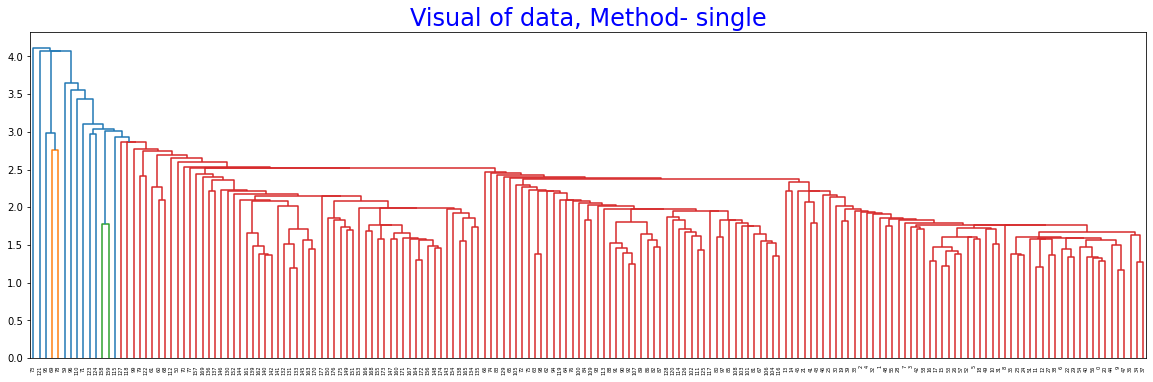

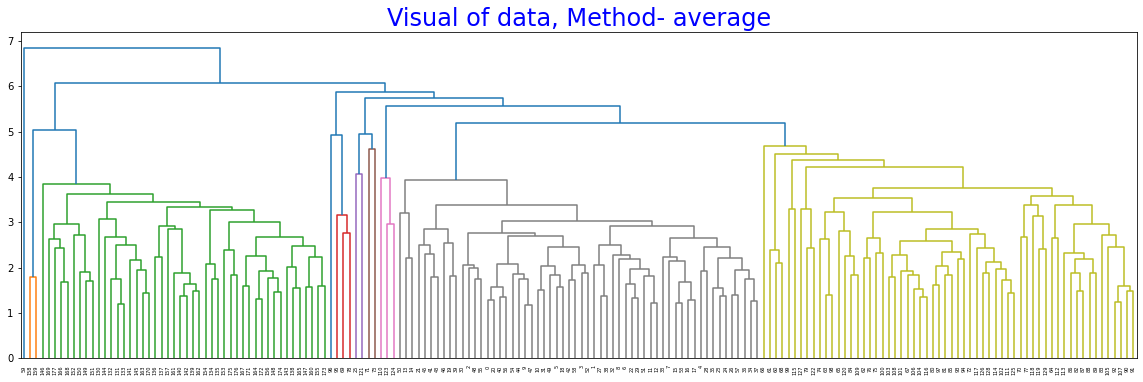

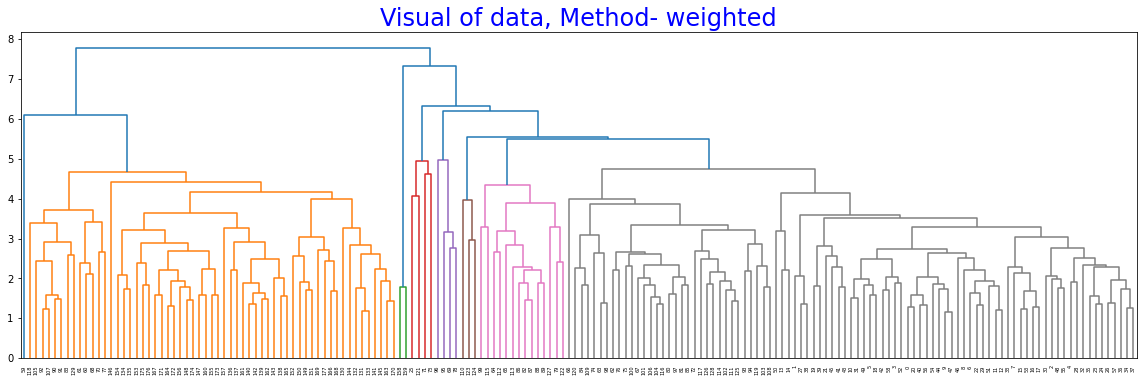

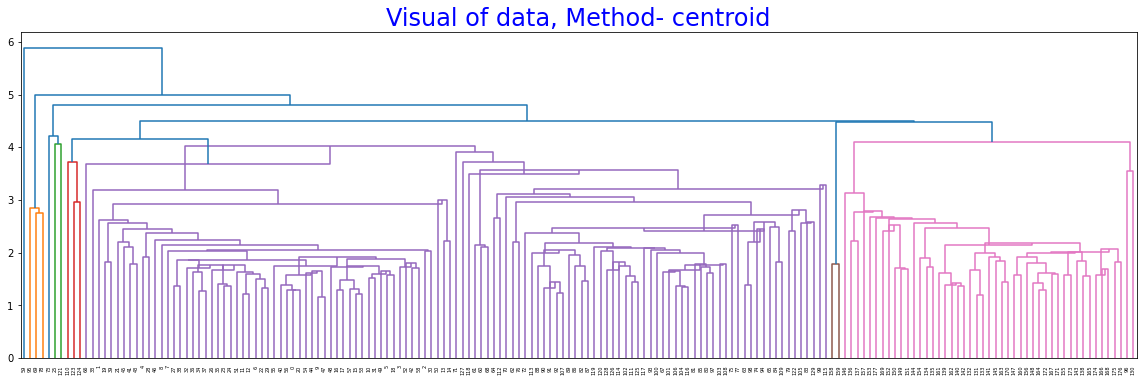

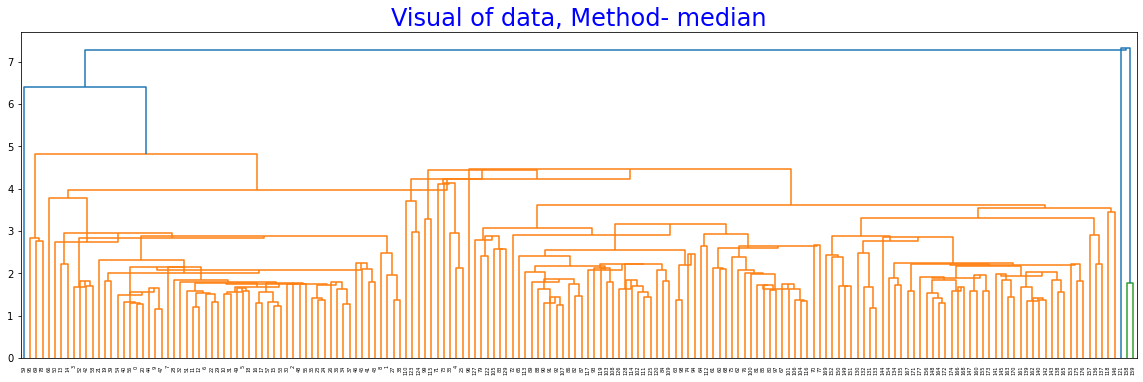

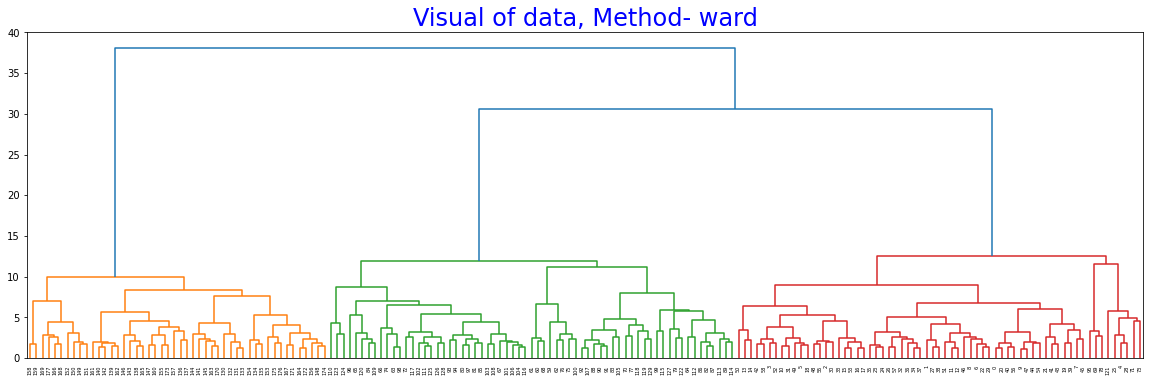

In [315]:
import scipy.cluster.hierarchy as shc
for methods in ['single','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visual of data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram = shc.dendrogram(shc.linkage(wine_std, method = methods,optimal_ordering=False))
   

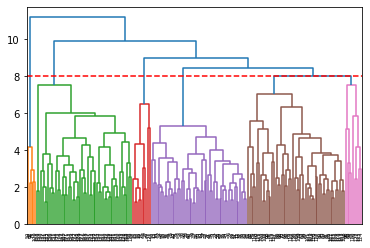

In [316]:
 dend = shc.dendrogram(shc.linkage(wine_std, method='complete'))
plt.axhline(y=8, color='r', linestyle='--')
plt.show()

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 8 and cut the dendrogram

In [323]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering 
n_clusters = [2,3,4,5,6,8,10] 

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels = hie_cluster.fit_predict(wine_std)
        silhouette_avg2 = silhouette_score(wine_std, hie_labels)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_avg2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.2917093910425583
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.04594885928967821
For n_clusters = 2 The average silhouette_score with linkage- average : 0.2406799576881685
For n_clusters = 2 The average silhouette_score with linkage- single : 0.19903671243634574

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3005913531964526
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.18254912152536407
For n_clusters = 3 The average silhouette_score with linkage- average : 0.27088172127301097
For n_clusters = 3 The average silhouette_score with linkage- single : 0.19632210087449528

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.29660814676148517
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.10289271204387264
For n_clusters = 4 The average silhouette_score with linkage- average : 0.244623782133921

# KMeans clustering with PCA Results

In [329]:
pca_km=pd.concat([wine_n.reset_index(drop=True),pd.DataFrame(pca_scores)],axis=1)

In [330]:
pca_km.columns.values[-3:]=['pc1','pc2','pc3']

In [331]:
pca_km['kmeans']=kmeans.labels_

In [332]:
pca_km.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,pc1,pc2,pc3,kmeans
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,-3.522934,-1.453098,-0.164795,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,-2.528858,0.330019,-2.026707,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,-2.785029,-1.036936,0.983238,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,-3.922588,-2.768210,-0.174968,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,-1.407511,-0.867773,2.025829,1


In [334]:
pca_km['kmpca']=pca_km['kmeans'].map({0:'first',1:'second',2:'Third',4:'fourth',5:'fifth',6:'sixth'})
pca_km['kmpca']

0      second
1      second
2      second
3      second
4      second
        ...  
173     first
174     first
175     first
176     first
177     first
Name: kmpca, Length: 178, dtype: object

# # So, let’s visualize the segments with respect to the first two components.

Let’s finish off by visualizing our clusters on a 2D plane.

It’s a 2D visualization, so we need to choose two components and use them as axes. 

The point of PCA was to determine the most important components. 

This way, we can be absolutely sure that the first two components explain more variance than the other

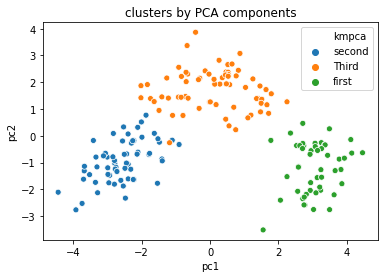

In [335]:
import seaborn as sns
x_axis=pca_km['pc1']
y_axis=pca_km['pc2']
sns.scatterplot(x_axis,y_axis,hue=pca_km['kmpca'])
plt.title("clusters by PCA components")
plt.show()

# Conclusion:-
# Combining PCA and K-Means Clustering: Overview
Finally, it is important to note that our data set contained only a few features . So, when we further reduced the dimensionality, using ‘P C A’ we found out we only need 3 components to separate the data.

That’s the reason why even a two-dimensional plot is enough to see the separation.